# ABS Quarterly Labour Account 6150

## Python set-up

In [1]:
# system imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from plotting import (
    set_chart_dir,
    recalibrate_series,
    clear_chart_dir,
    plot_covid_recovery,
    finalise_plot,
    plot_growth_finalise,
    calc_growth,
)
from abs_data_capture import (
    get_fs_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
    get_meta_constants,
    get_identifier,
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting stuff
plt.style.use("fivethirtyeight")

## Get data from ABS

In [2]:
# Get labour account data
labour_catalogue_id = "6150"
source, CHART_DIR, META_DATA = get_fs_constants(labour_catalogue_id)
abs_labour = get_ABS_meta_and_data(labour_catalogue_id)
if abs_labour is None:
    sys.exit(-1)
meta_labour = abs_labour[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta_labour)
did_col, id_col, table_col, type_col, unit_col = get_meta_constants()

# Get GDP to calculate labour productivity
gdp_catalogue_id = "5206"
abs_gdp = get_ABS_meta_and_data(gdp_catalogue_id)
if abs_gdp is None:
    sys.exit(-1)
meta_gdp = abs_gdp[META_DATA]

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot

In [3]:
# get ready to lay down new plots
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)

### Labour productivity - GDP per hour worked ...

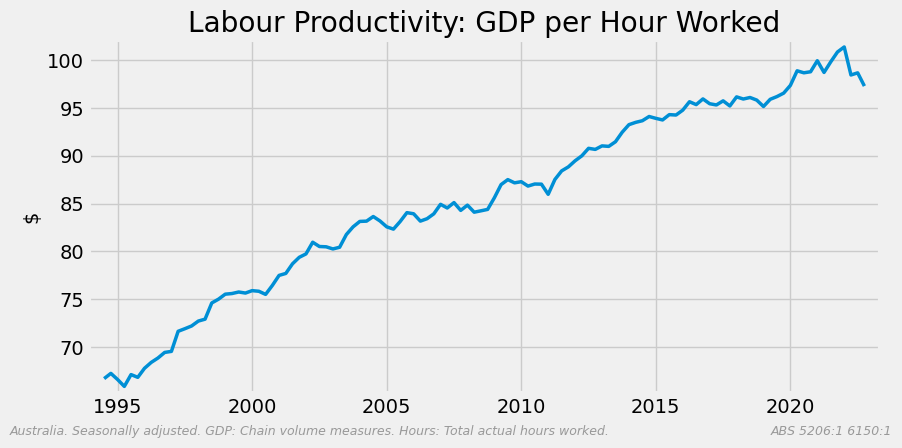

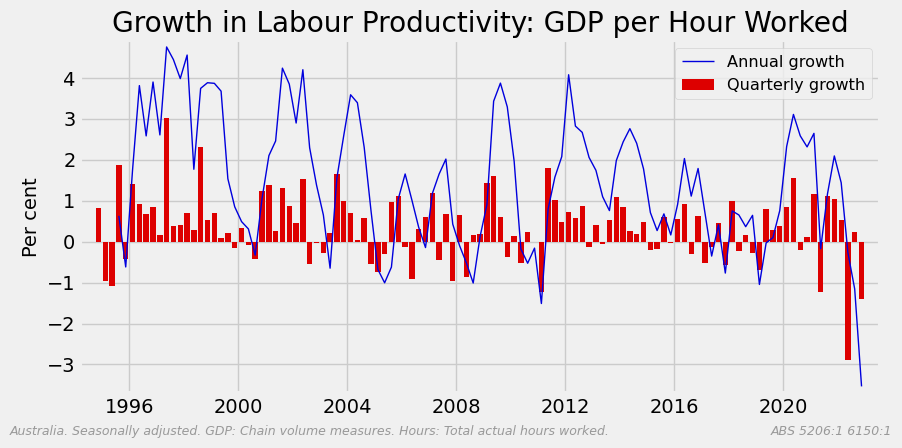

In [4]:
# GDP ...
gdp_table = '1'
series_type = 'Seasonally Adjusted'
did = 'Gross domestic product: Chain volume measures ;'
gdp_id, units = get_identifier(meta_gdp, did, series_type, gdp_table)
gdp = abs_gdp[gdp_table][gdp_id] * 1_000_000 

# Hours worked ...
labour_table = '1'
series_type = 'Seasonally Adjusted'
did = 'Volume; Labour Account hours actually worked in all jobs ;  Australia ;  Total all industries ;'
hours_id, units = get_identifier(meta_labour, did, series_type, labour_table)
hours = abs_labour[labour_table][hours_id] * 1_000

# calculate productivity and plot
productivity = gdp / hours
ax = productivity.dropna().plot(lw=2.5)
title = "Labour Productivity: GDP per Hour Worked"
lfooter = (
    f"Australia. {series_type.capitalize()}. GDP: Chain volume measures. "
    "Hours: Total actual hours worked. "
)
rfooter = f"ABS {gdp_catalogue_id}:{gdp_table} {labour_catalogue_id}:{labour_table}"
units = '$'

finalise_plot(
    ax,
    title=title,
    ylabel=units,
    rfooter=rfooter,
    lfooter=lfooter,
    show=True,
)

growth = calc_growth(productivity)
plot_growth_finalise(
    *growth,
    title=f'Growth in {title}',
    rfooter=rfooter,
    lfooter=lfooter,
    show=True,
)

### Headline

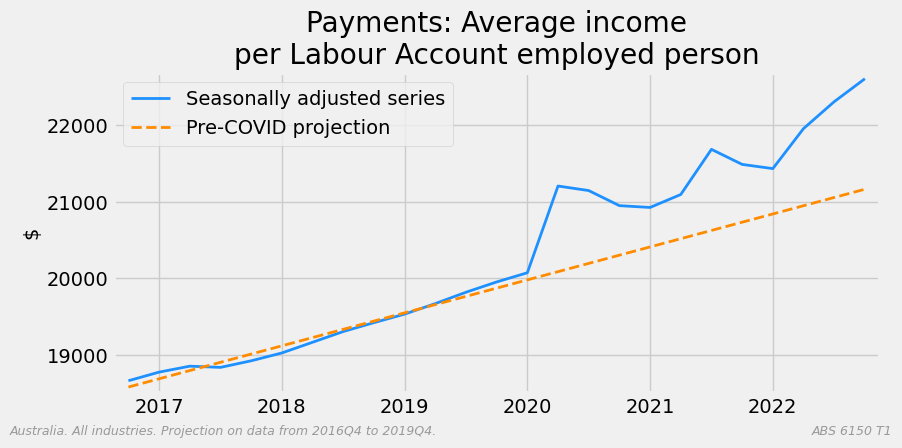

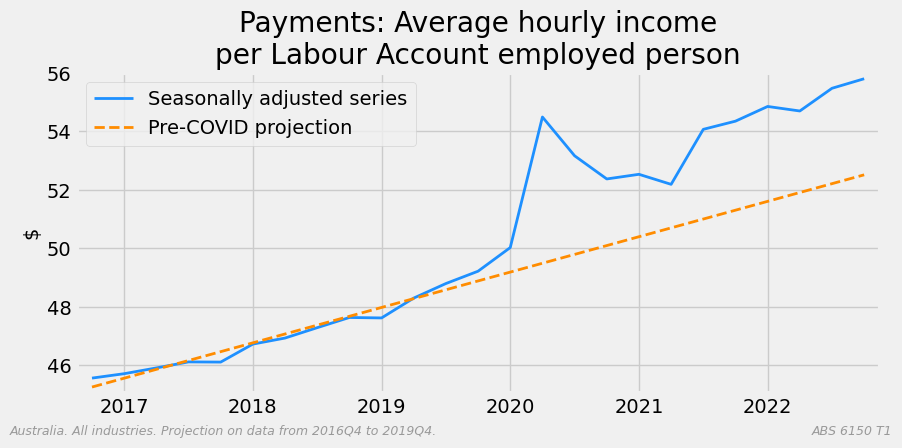

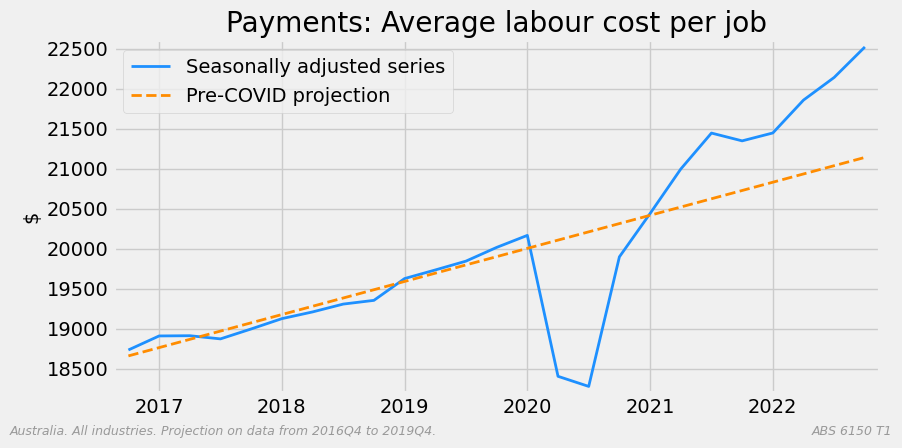

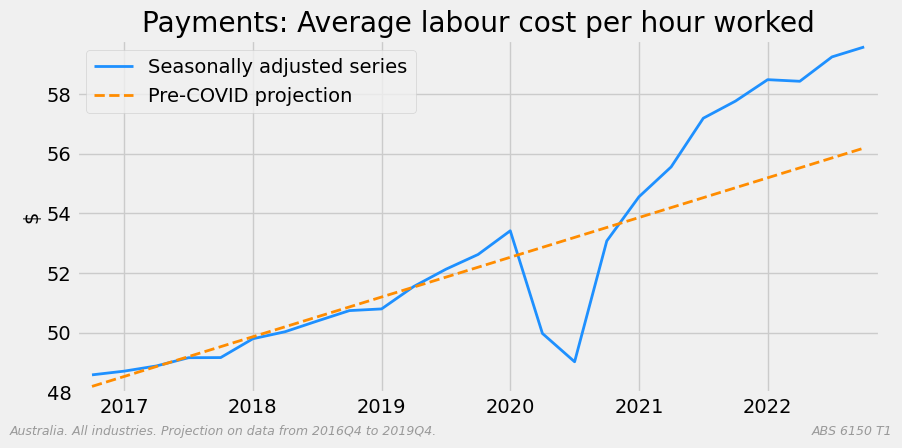

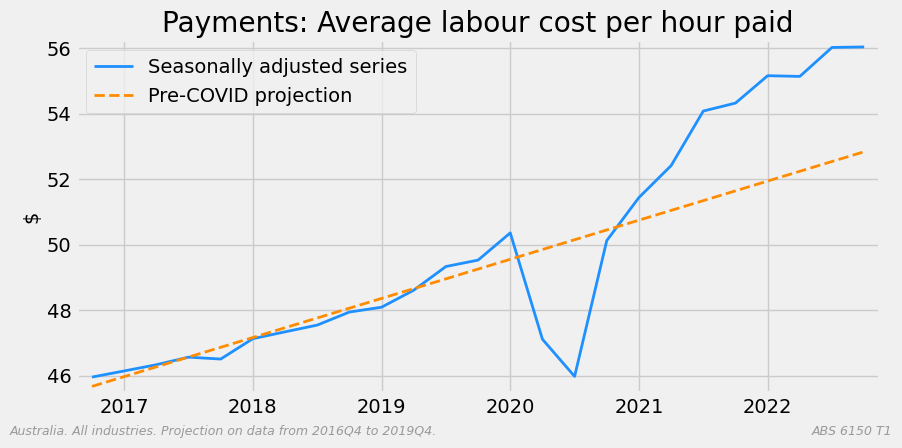

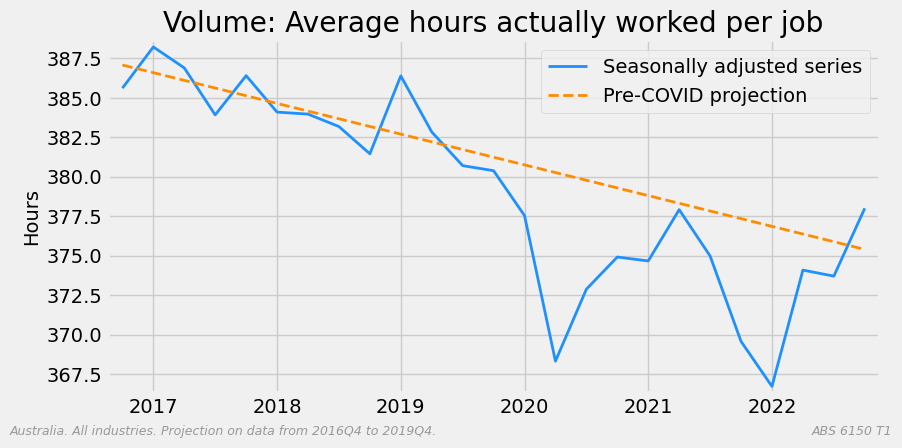

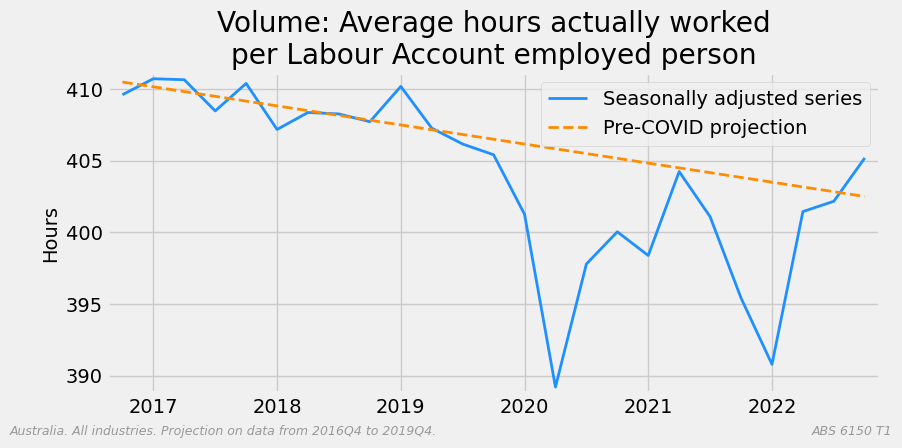

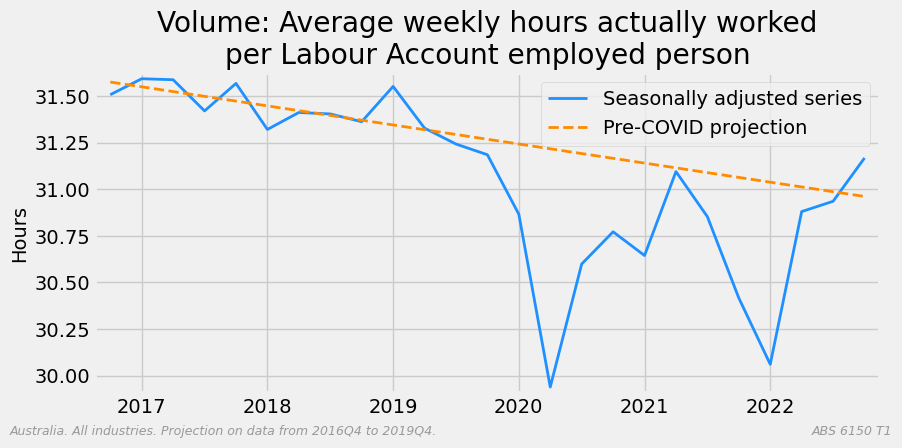

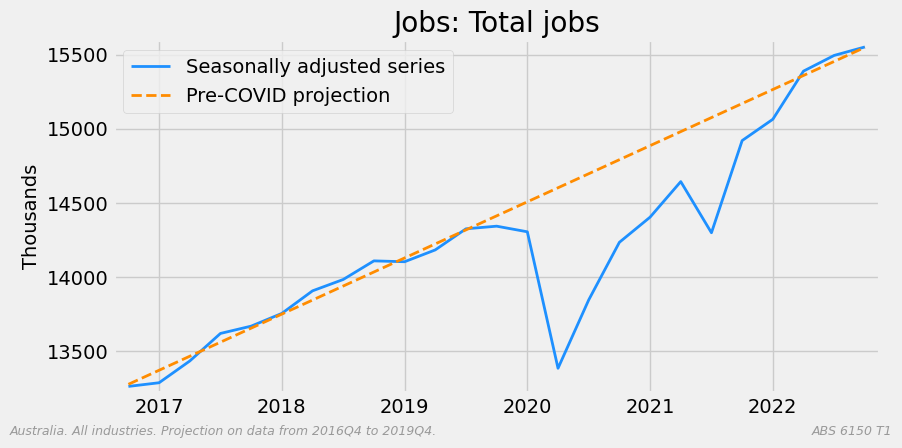

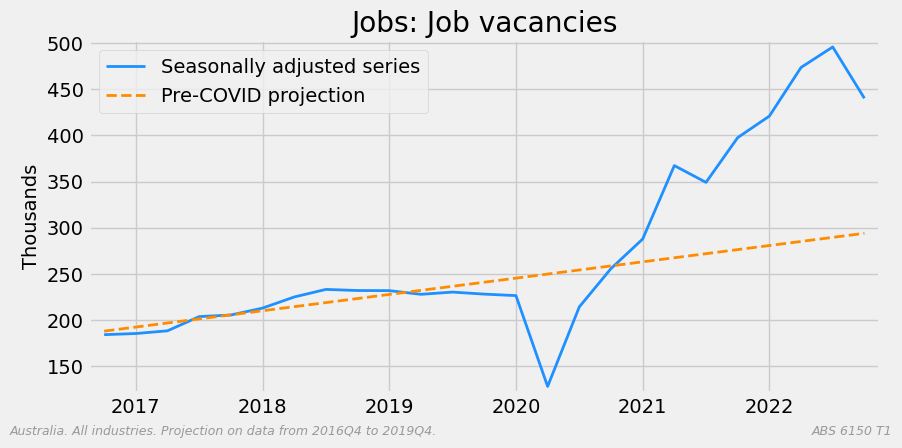

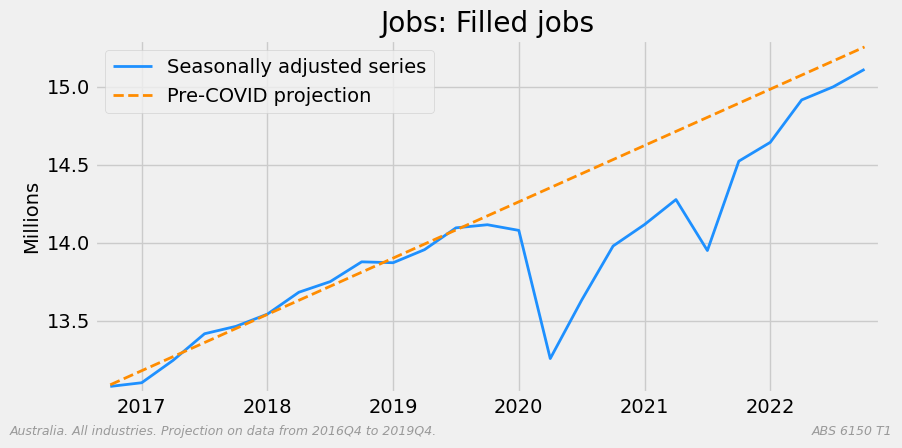

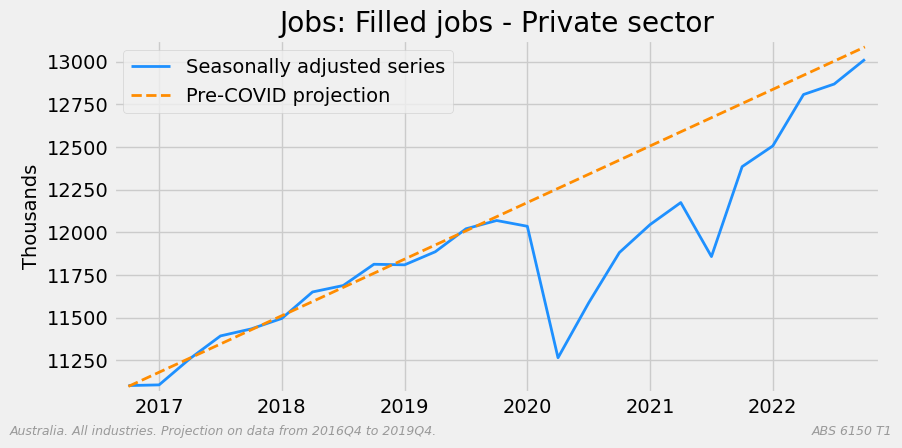

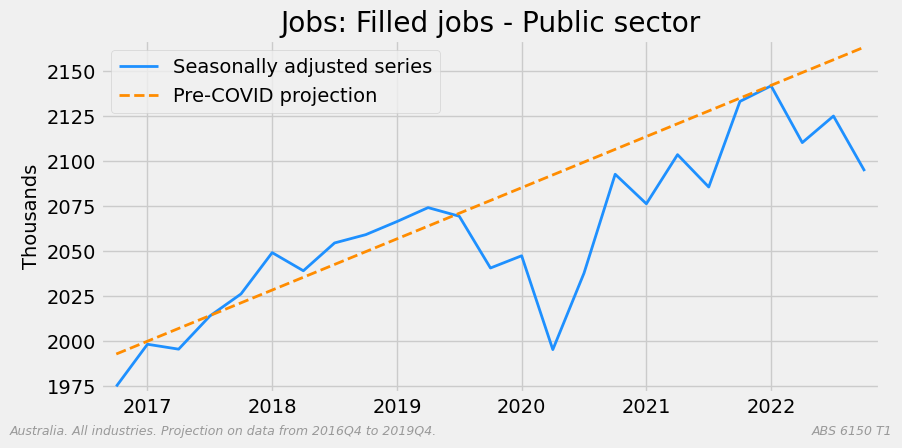

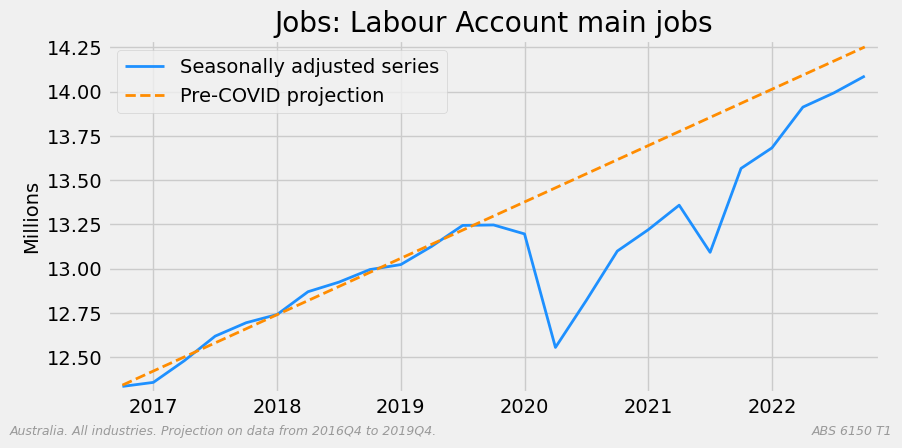

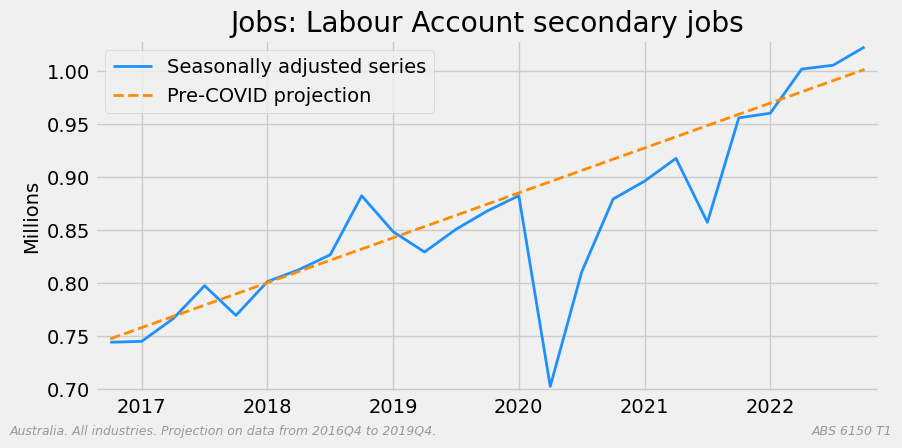

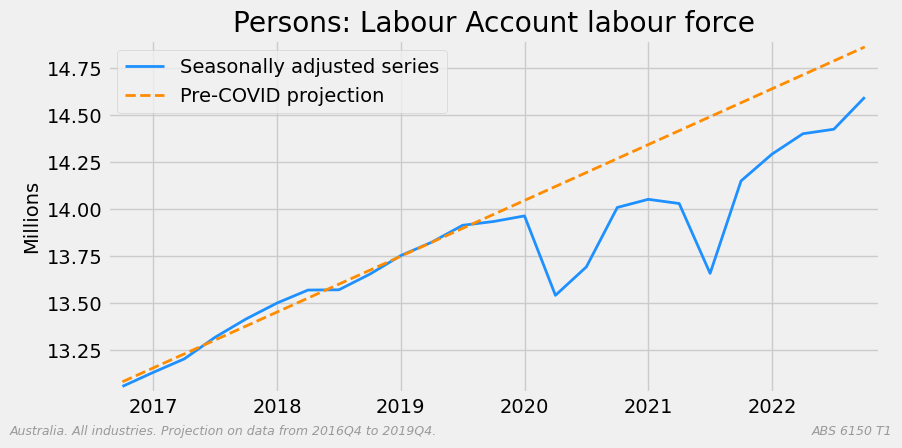

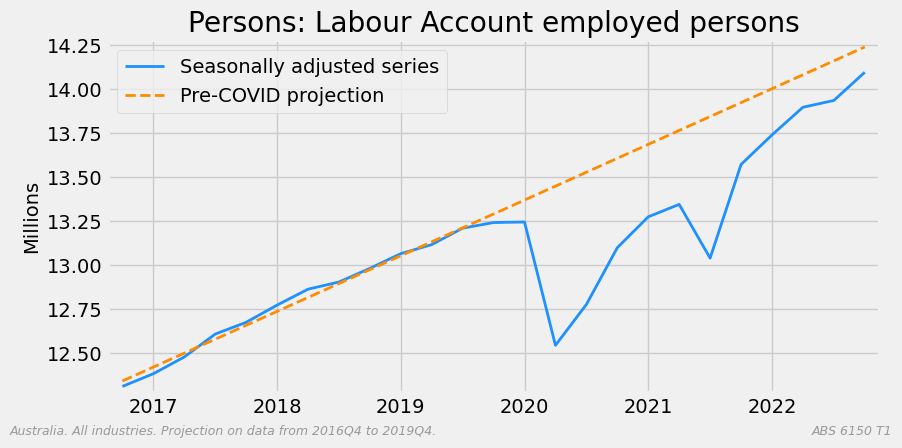

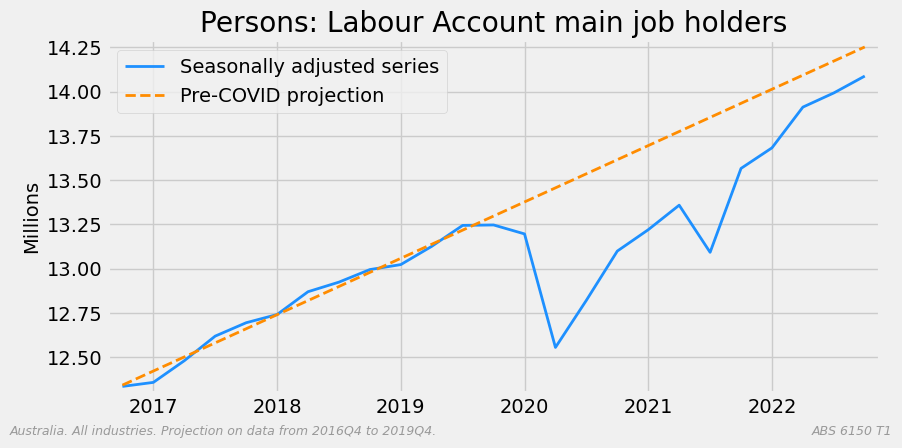

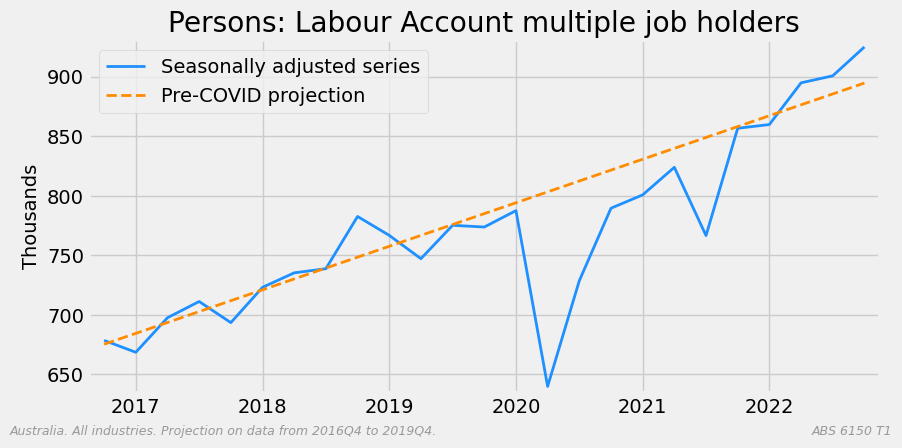

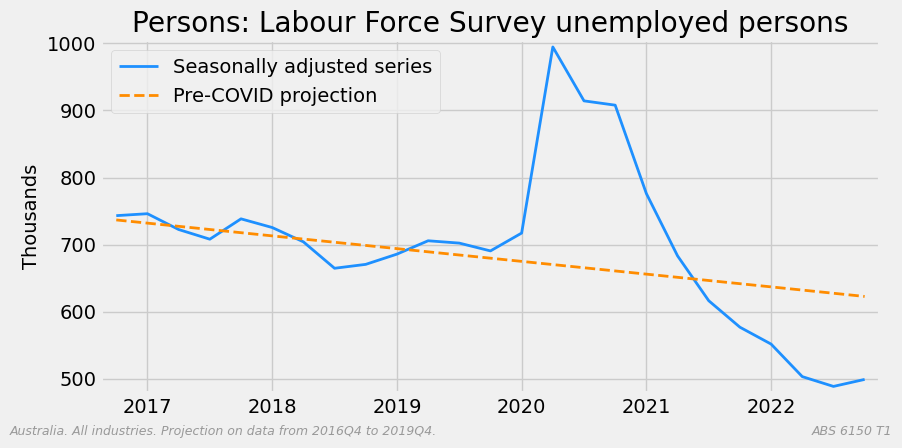

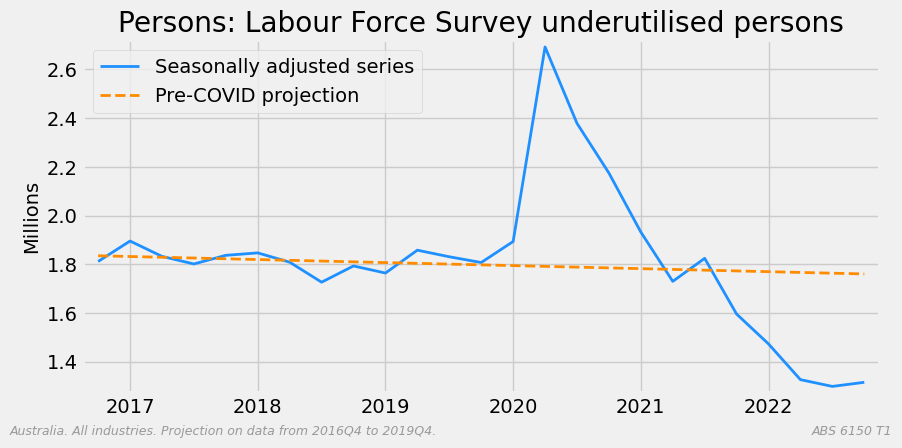

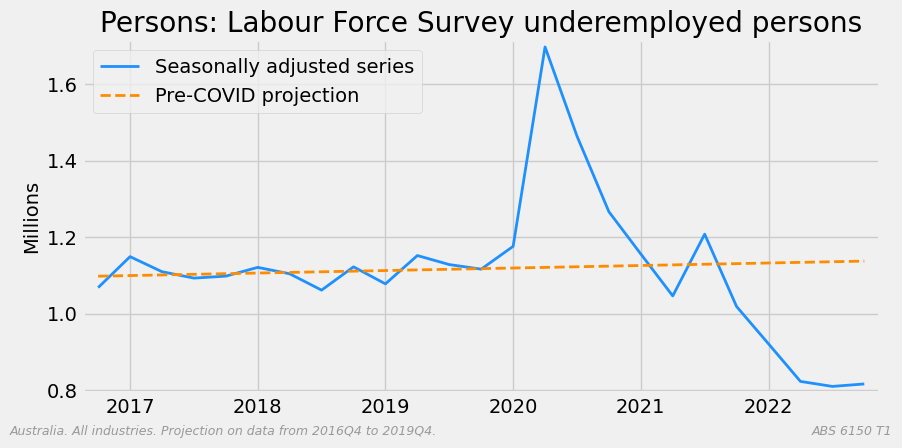

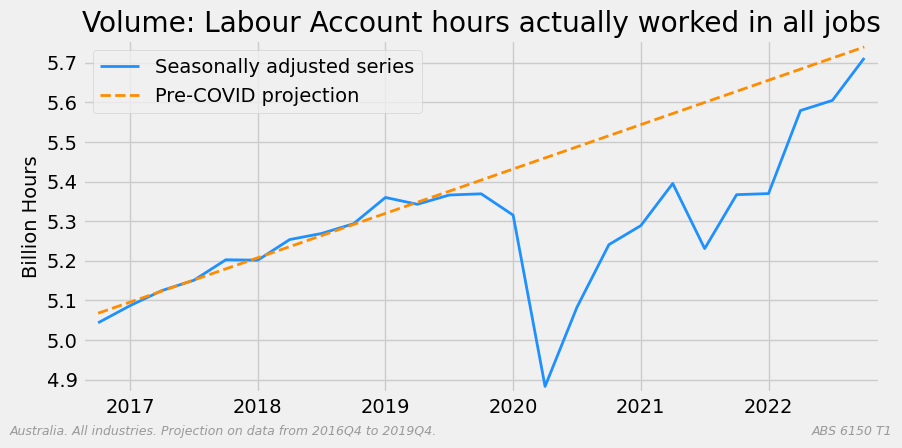

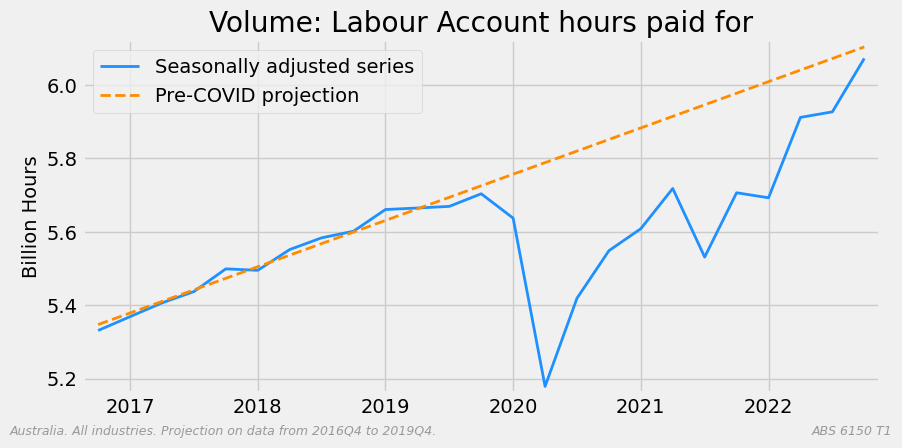

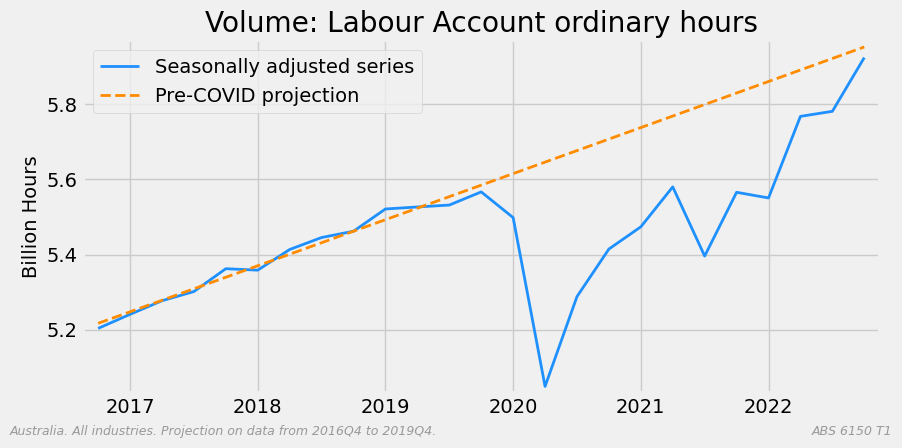

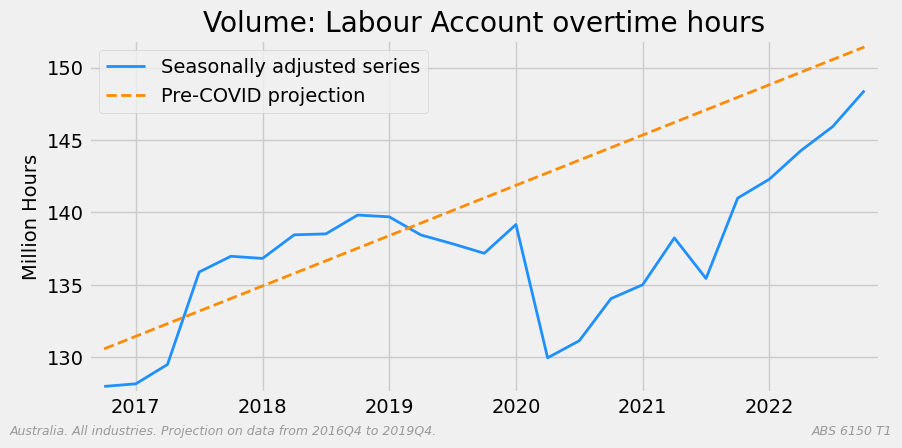

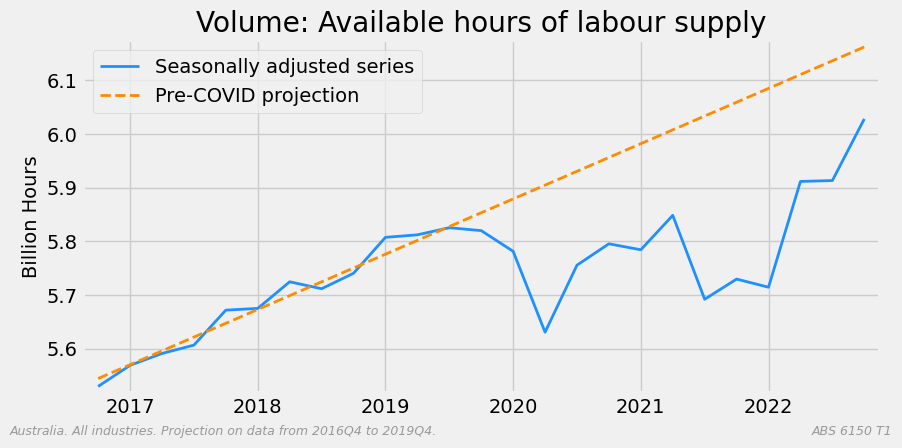

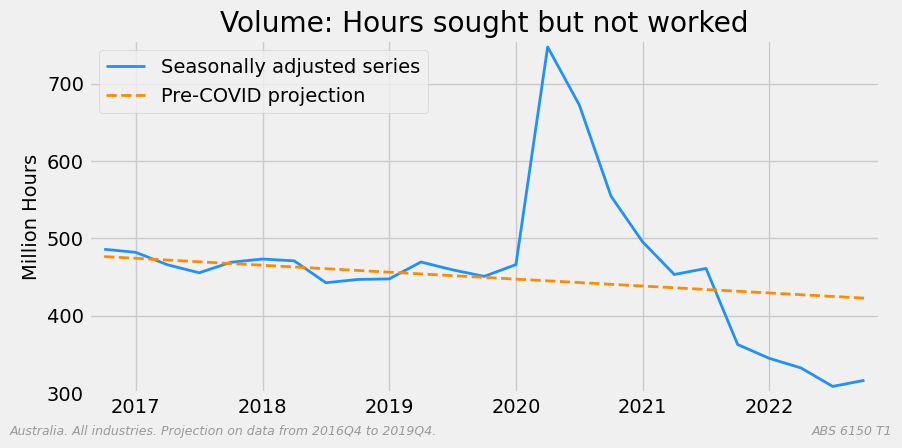

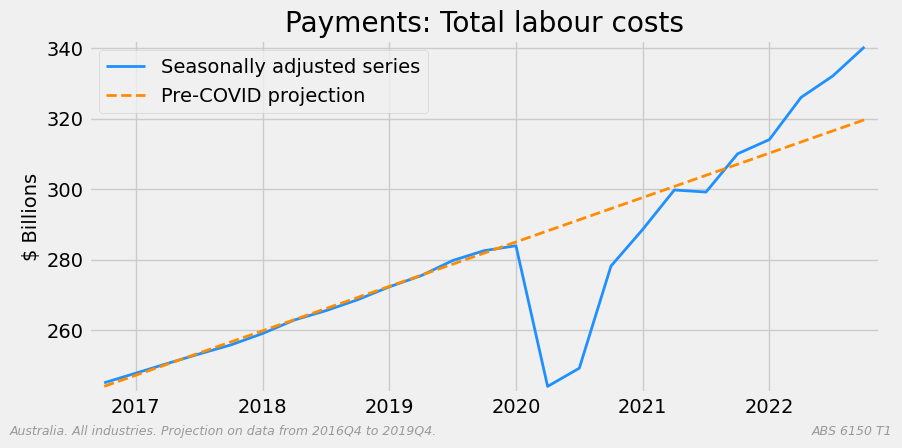

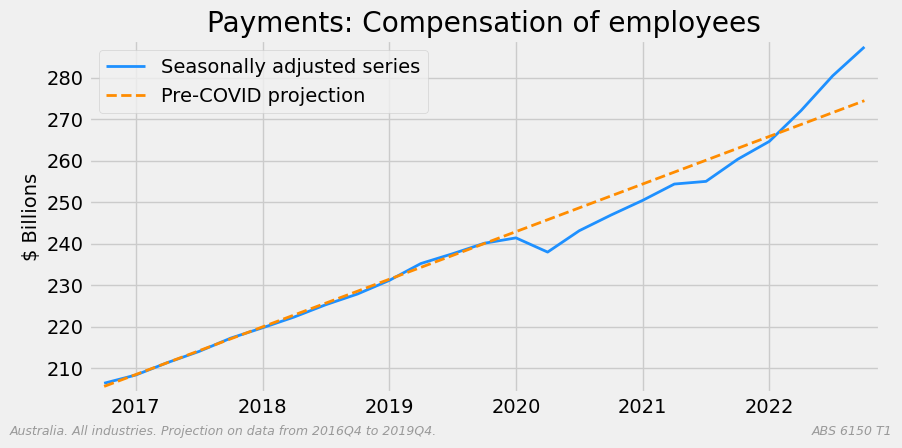

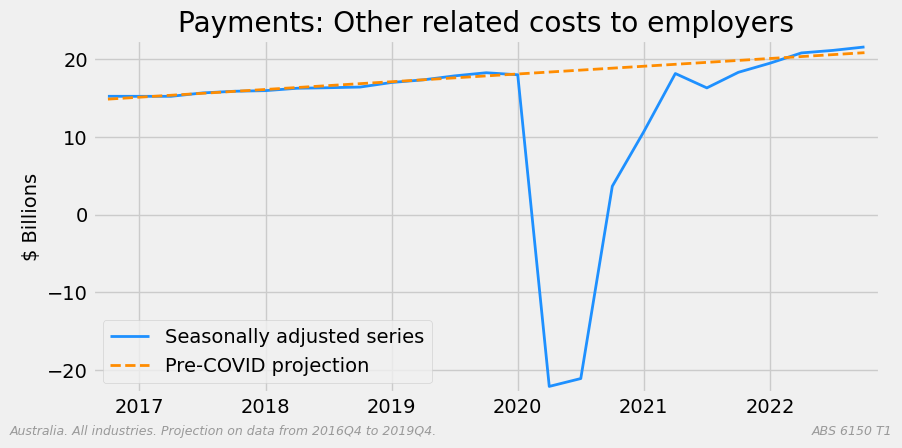

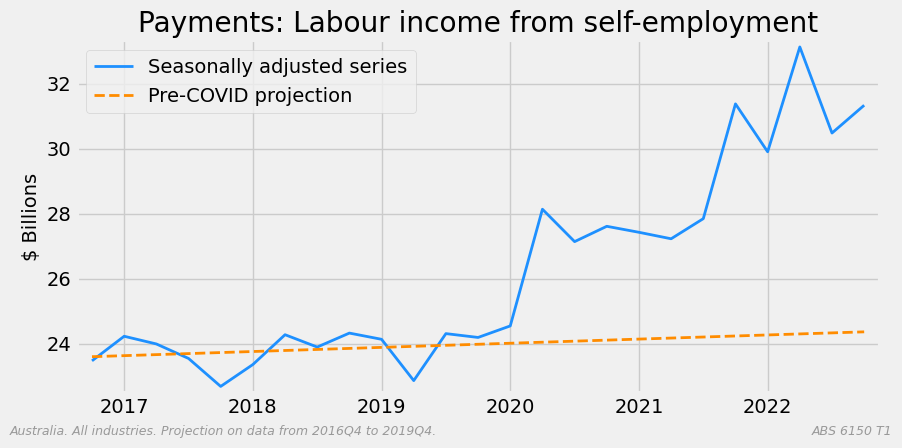

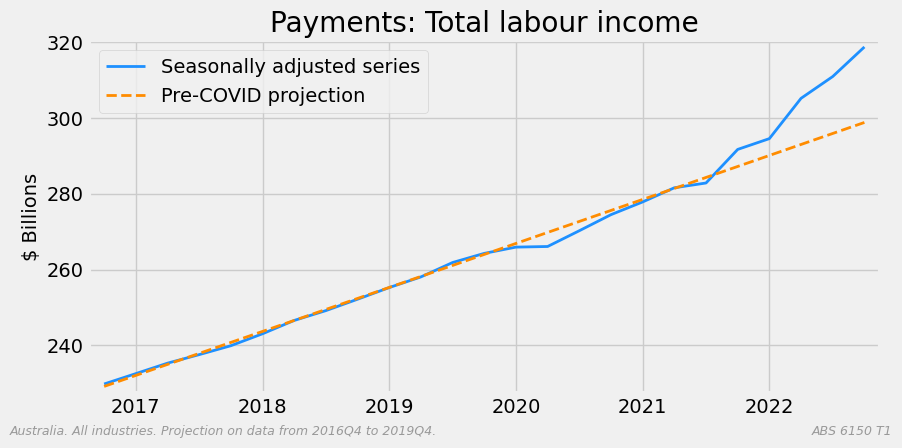

In [5]:
series_type = "Seasonally Adjusted"
not_unit = "Percent"
table = "1"
data = abs_labour[table]

rows = meta_labour[
    (meta_labour[table_col] == table)
    & (meta_labour[type_col] == series_type)
    & (meta_labour[unit_col] != not_unit)
]

for index, row in rows.iterrows():
    series_id, units, title = row[id_col], row[unit_col], row[did_col]
    plotable, units = recalibrate_series(data[series_id], units)
    plotable.name = f"{series_type.capitalize()} series"

    plot_covid_recovery(
        plotable,
        title=(
            title.replace(" ;  Australia ;  Total all industries ;", "")
            .replace(" per Labour Account", "\nper Labour Account")
            .replace(" ; ", " - ")
            .replace("; ", ": ")
        ),
        ylabel=units,
        rfooter=f"{source} T{table}",
        lfooter="Australia. All industries. ",
        show=True,
    )

## Finished

In [6]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Sun Mar 05 2023 17:51:41

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.11.0

pandas    : 1.5.3
sys       : 3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
matplotlib: 3.7.0

Watermark: 2.3.1



In [7]:
print("Finished")

Finished
